<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-17 10:40:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  46.5MB/s    in 4.4s    

2025-11-17 10:40:08 (46.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 155.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 175.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 135.3 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)

print(f"Demo - Describing a Table:")
print(df.iat[0,0])

Demo - Describing a Table:
CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "Mis

## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [10]:
query = """
SELECT CompTotal FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)
print(df)

       CompTotal
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
65432        NaN
65433        NaN
65434        NaN
65435        NaN
65436        NaN

[65437 rows x 1 columns]


In [11]:
#check unique value
print('\nThere are', df['CompTotal'].nunique(), 'unique CompTotal values in the survey:')
print(df['CompTotal'].value_counts())


There are 3337 unique CompTotal values in the survey:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64


In [12]:
max_CompTotal = df['CompTotal'].max()
print(max_CompTotal)

min_CompTotal = df['CompTotal'].min()
print(min_CompTotal) 

1.0000000000000002e+150
0.0


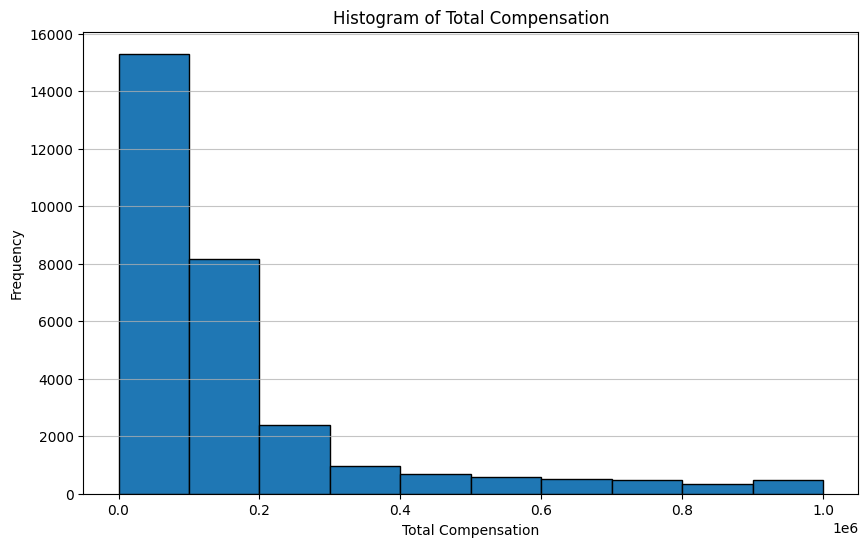

In [13]:
#convert 'CompTotal' to numeric, coercing errors to NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

#drop rows with NaN in 'CompTotal'
df.dropna(subset=['CompTotal'], inplace=True)

#plot the histogram
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
plt.figure(figsize=(10, 6))
df['CompTotal'].plot(kind='hist', bins=bins, edgecolor='black')
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [14]:
#execute SQL query to retrive data
query = """
SELECT YearsCodePro FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

In [15]:
#check unique value
print('\nThere are', df['YearsCodePro'].nunique(), 'unique YearsCodePro values in the survey:')
print(df['YearsCodePro'].value_counts())


There are 52 unique YearsCodePro values in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34           

In [20]:
#replace Less than 1 year with 0.5 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})

#check after replacement
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2      4168
3      4093
5      3526
10     3251
4      3215
0.5    2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


In [21]:
#convert column to numeric
# non-convertible values (like NaNs in a different format) into NaN (Not a Number).
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#drop NaN value
df_cleaned = df.dropna(subset=['YearsCodePro_numeric'])

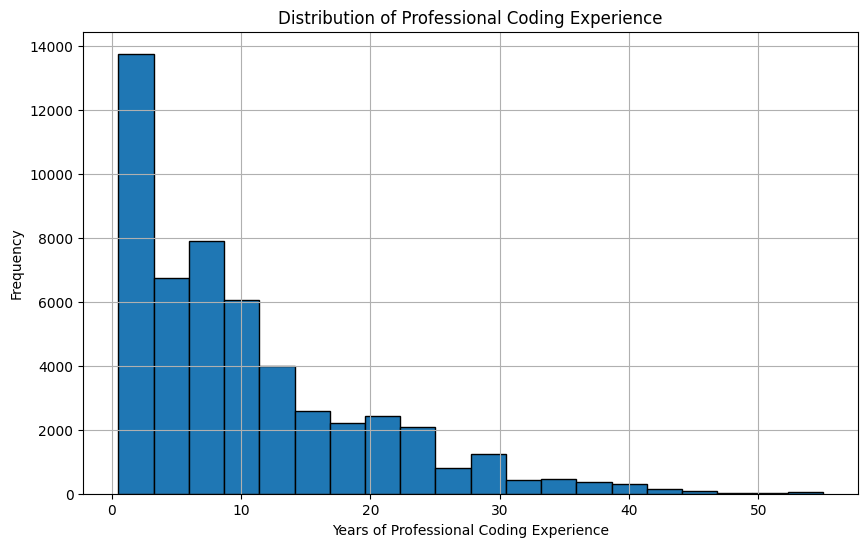

In [23]:
#plot the histogram
df_cleaned['YearsCodePro_numeric'].hist(bins=20, figsize=(10, 6), edgecolor='black')

plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [16]:
#execute SQL query to retrive data
query = """
SELECT CompTotal, Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

In [23]:
('Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older')

('Under 18 years old',
 '18-24 years old',
 '25-34 years old',
 '35-44 years old',
 '45-54 years old',
 '55-64 years old',
 '65 years or older')

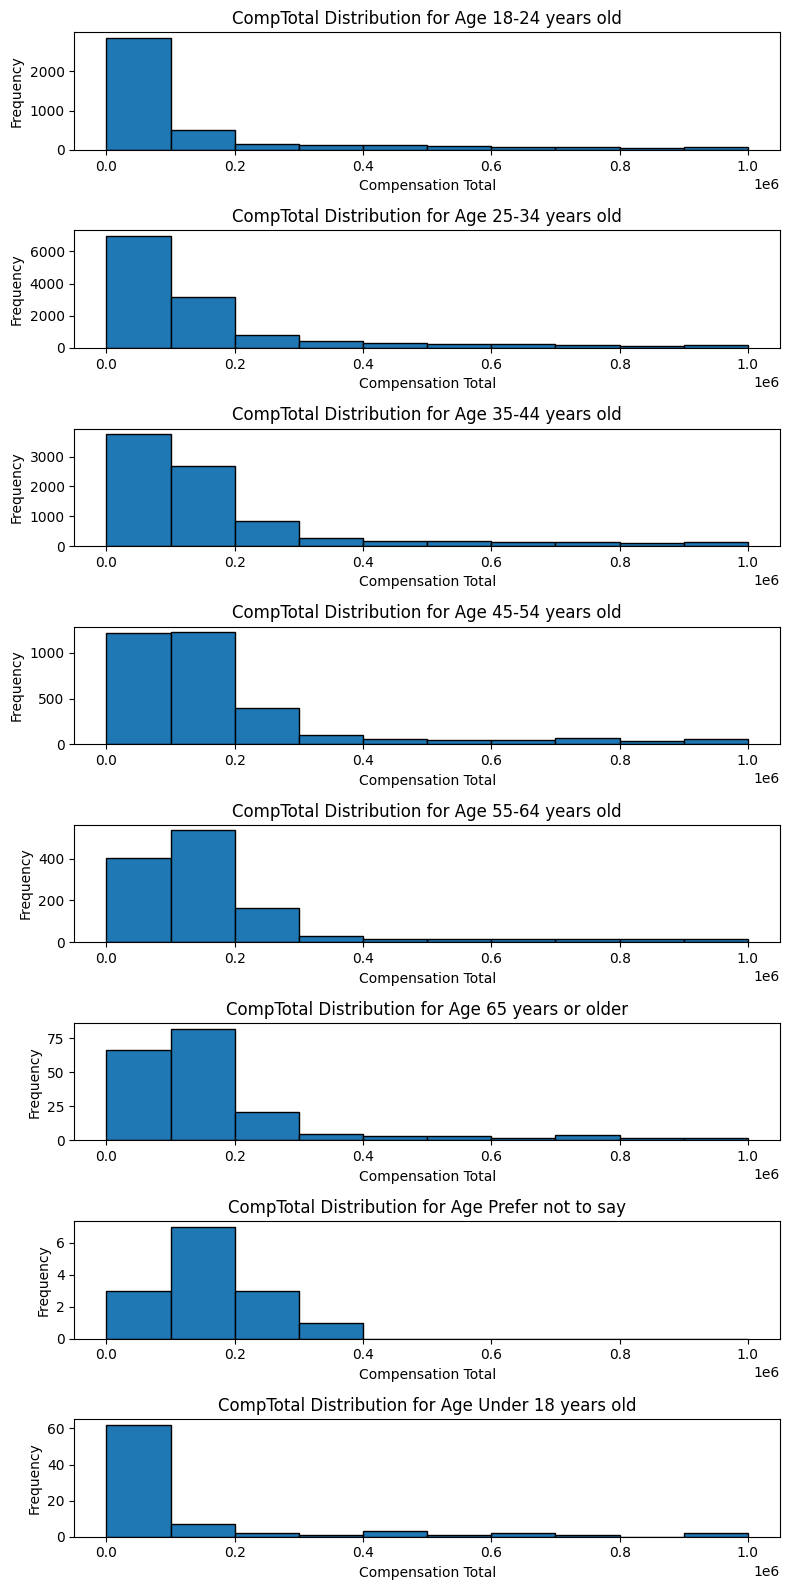

In [22]:
# Group by Age and plot histograms of CompTotal for each group
fig, axes = plt.subplots(nrows=len(df['Age'].unique()), figsize=(8, 2 * len(df['Age'].unique())))
axes = axes.flatten() # Flatten in case of single row/column

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
for i, (age_group, group_df) in enumerate(df.groupby('Age')):
    group_df['CompTotal'].plot(kind='hist', ax=axes[i], bins=bins, edgecolor='black')
    axes[i].set_title(f'CompTotal Distribution for Age {age_group}')
    axes[i].set_xlabel('Compensation Total')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [30]:
#execute SQL query to retrive data
query = """
SELECT TimeSearching, Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

In [27]:
#check unique value
print('\nThere are', df['TimeSearching'].nunique(), 'unique TimeSearching values in the survey:')
print(df['TimeSearching'].value_counts())


There are 5 unique TimeSearching values in the survey:
TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


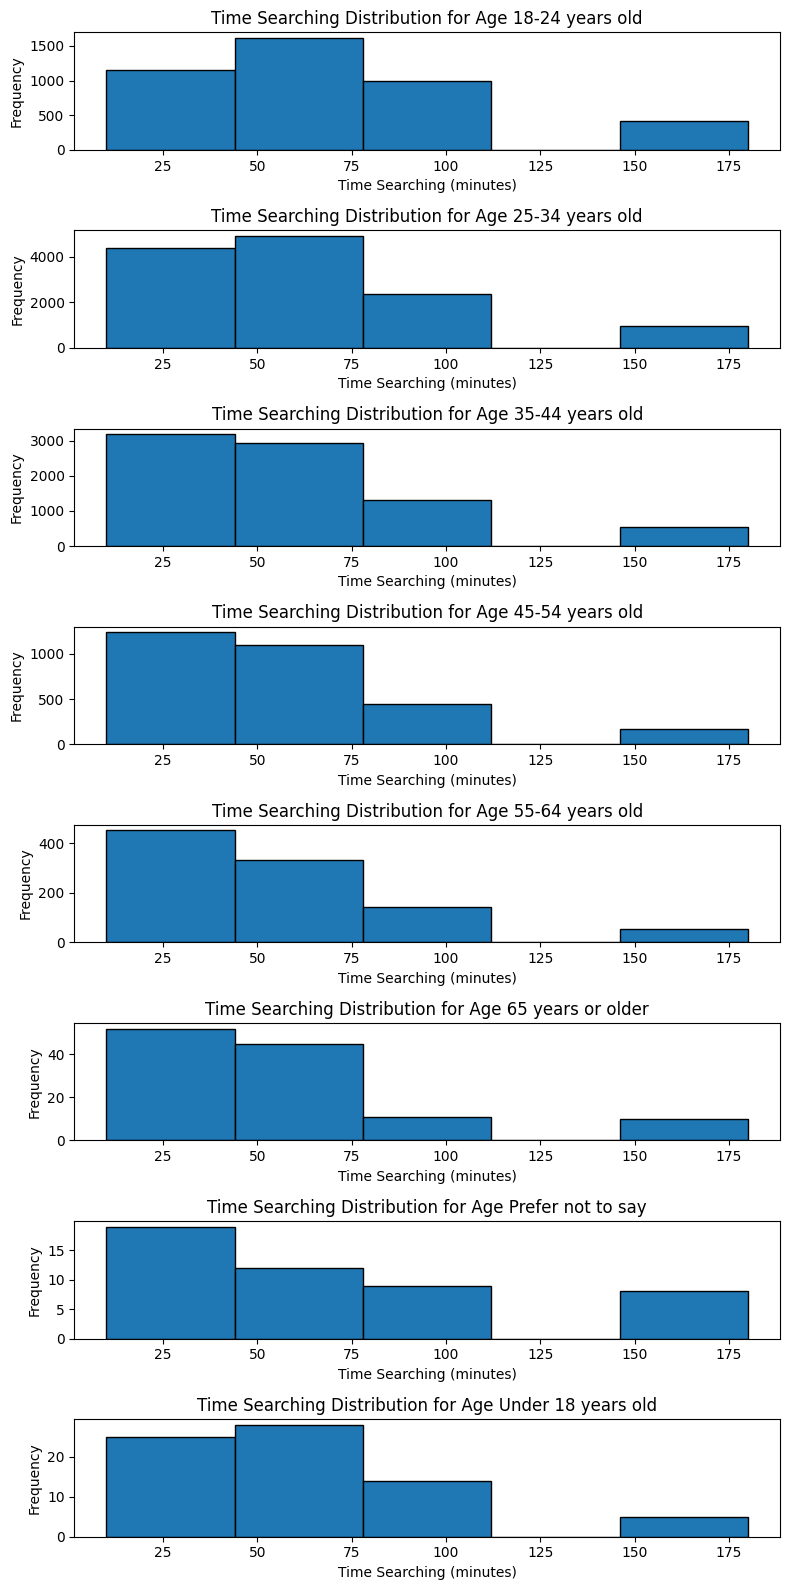

In [38]:
#map the 'TimeSearching' column to approximate numeric values
#if 'TimeSearching' is currently stored as a categorical variable (e.g., '30-60', '15-30'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the TimeSearching range).
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 23,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 180,
}
df['Time_Numeric'] = df['TimeSearching'].map(time_mapping)

#get unique age groups for iteration
unique_age_groups = df['Age'].unique()
num_plots = len(unique_age_groups)

figure, axes = plt.subplots(nrows=num_plots, figsize=(8, 2 * num_plots))

#ensure 'axes' is an iterable array even if there is only one subplot
if num_plots == 1:
    axes = [axes]

# Use the correct iteration variable
for j, (age_group1, group1_df) in enumerate(df.groupby('Age')):
    # Use the correct index 'j' for accessing axes array elements
    group1_df['Time_Numeric'].plot(kind='hist', ax=axes[j], bins=5, edgecolor='black')
    axes[j].set_title(f'Time Searching Distribution for Age {age_group1}')
    axes[j].set_xlabel('Time Searching (minutes)')
    axes[j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [64]:
#execute SQL query to retrive data
query = """
SELECT DatabaseWantToWorkWith FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

In [40]:
#check unique value
print('\nThere are', df['DatabaseWantToWorkWith'].nunique(), 'unique DatabaseWantToWorkWith values in the survey:')
print(df['DatabaseWantToWorkWith'].value_counts())


There are 8478 unique DatabaseWantToWorkWith values in the survey:
DatabaseWantToWorkWith
PostgreSQL                                                                 3738
PostgreSQL;SQLite                                                          1533
SQLite                                                                     1476
Microsoft SQL Server                                                       1431
MySQL                                                                      1139
                                                                           ... 
Clickhouse;MariaDB;MySQL;PostgreSQL;Redis                                     1
MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite;TiDB               1
DuckDB;Elasticsearch;MongoDB;PostgreSQL                                       1
H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite                        1
BigQuery;Cassandra;Firebase Realtime Database;PostgreSQL;Redis;Supabase       1
Name: count, Length: 8478, dt

In [58]:
from collections import Counter

#function to count database frequencies
def count_database(series):
    all_database = []
    for entry in series.dropna():
        all_database.extend(entry.split(';'))
    return Counter(all_database)

#get frequencies
database_want_work = count_database(df['DatabaseWantToWorkWith'])

#convert to DataFrames for easier manipulation
df_want = pd.DataFrame(database_want_work.items(), columns=['Database', 'Count'])

print(df_want)

#get top 5 database
df_want.head(5)

                      Database  Count
0                   PostgreSQL  24005
1   Firebase Realtime Database   2536
2                      MongoDB  10982
3                        MySQL  12269
4                       SQLite  13489
5              Cloud Firestore   2119
6                     Supabase   2930
7                        Redis  10847
8                Elasticsearch   6246
9         Microsoft SQL Server   7905
10                      Oracle   2636
11                     MariaDB   5947
12                      Presto    319
13                    Dynamodb   3503
14                   Cosmos DB   1764
15            Microsoft Access    662
16                      DuckDB   1468
17                   Cassandra   2399
18                  Clickhouse   1328
19                          H2   1040
20                       Neo4J   1570
21                 Cockroachdb   1157
22                    Couch DB    620
23                     RavenDB    222
24                    BigQuery   2554
25          

,Database,Count
0,PostgreSQL,24005
1,Firebase Realtime Database,2536
2,MongoDB,10982
3,MySQL,12269
4,SQLite,13489


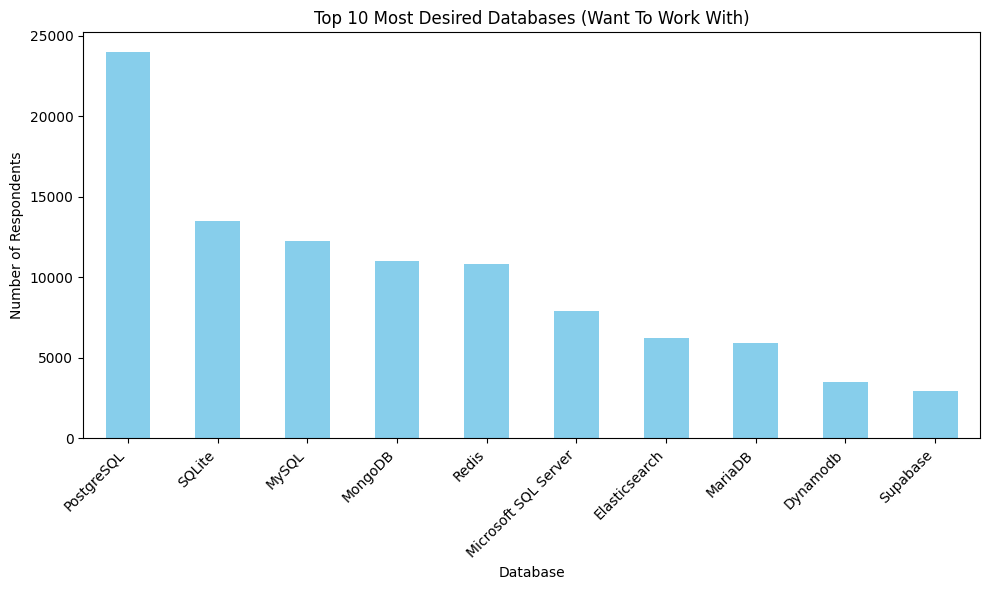

In [68]:
# If the data is collected as semi-colon separated strings in a single column (common in SO surveys),
# you will need to split and explode the entries first to count individual databases.
# Example if entries look like: 'MySQL;PostgreSQL'
if df['DatabaseWantToWorkWith'].dtype == 'object' and df['DatabaseWantToWorkWith'].str.contains(';').any():
    df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
    df = df.explode('DatabaseWantToWorkWith')
    # Strip any potential leading/trailing whitespace after splitting
    df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.strip()


# --- 2. Count the occurrences of each database ---
# value_counts() is the simplest way to count unique values in a Series
database_counts = df['DatabaseWantToWorkWith'].value_counts()

# --- 3. Optional: Select the top N databases for clarity ---
top_n = 10
top_databases = database_counts.head(top_n)

# --- 4. Plot the data as a bar chart ---
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
top_databases.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title(f'Top {top_n} Most Desired Databases (Want To Work With)')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to not cut off labels

# Display the plot
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [72]:
#execute SQL query to retrive data
query = """
SELECT RemoteWork FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

In [74]:
#check unique value
print('\nThere are', df['RemoteWork'].nunique(), 'unique RemoteWork values in the survey:')
print(df['RemoteWork'].value_counts())


There are 3 unique RemoteWork values in the survey:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


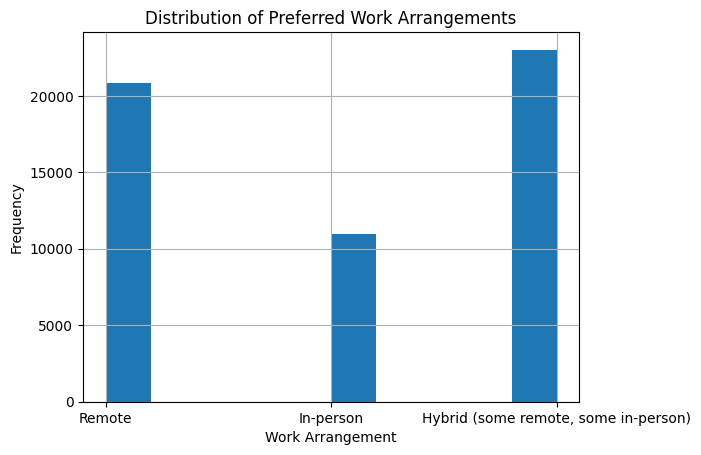

In [75]:
#plot the histogram
df['RemoteWork'].hist()
plt.xlabel("Work Arrangement")
plt.ylabel("Frequency")
plt.title("Distribution of Preferred Work Arrangements")

plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [76]:
#execute SQL query to retrive data
query = """
SELECT CompTotal, Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

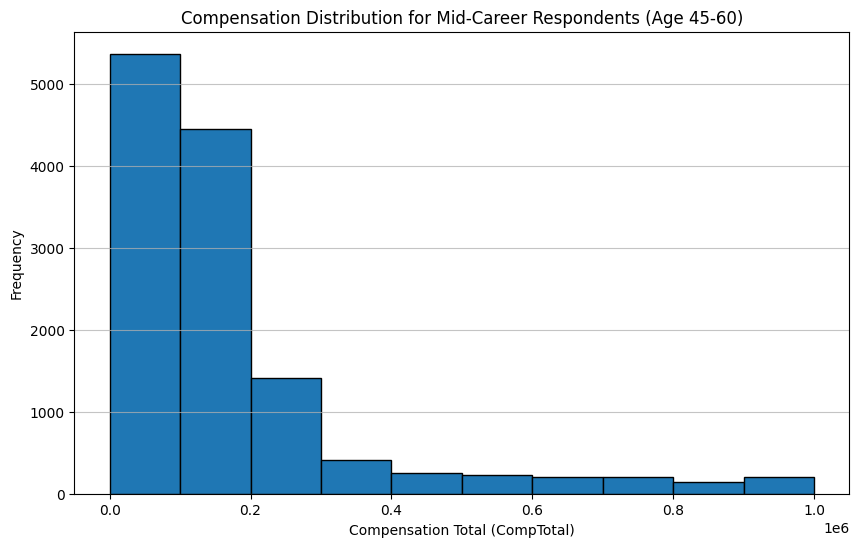

In [78]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#filter the DataFrame for the age group 45 to 60
mid_career_df = df[(df['Age_Numeric'] >= 40) & (df['Age_Numeric'] <= 60)]

#Plot the histogram of 'CompTotal' for the filtered data
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
plt.figure(figsize=(10, 6))
plt.hist(mid_career_df['CompTotal'], bins=bins, edgecolor='black') # Adjust bins as needed
plt.title('Compensation Distribution for Mid-Career Respondents (Age 45-60)')
plt.xlabel('Compensation Total (CompTotal)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [79]:
#execute SQL query to retrive data
query = """
SELECT JobSat, YearsCodePro FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

In [80]:
#check unique value
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

print('There are', df['JobSat'].nunique(), 'unique JobSat in the survey:')
print(df['JobSat'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                   

In [81]:
#replace Less than 1 year with 0.5 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})

#check after replacement
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2      4168
3      4093
5      3526
10     3251
4      3215
0.5    2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


In [83]:
#convert column to numeric
# non-convertible values (like NaNs in a different format) into NaN (Not a Number).
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#drop NaN value
df_cleaned = df.dropna(subset=['YearsCodePro_numeric'])

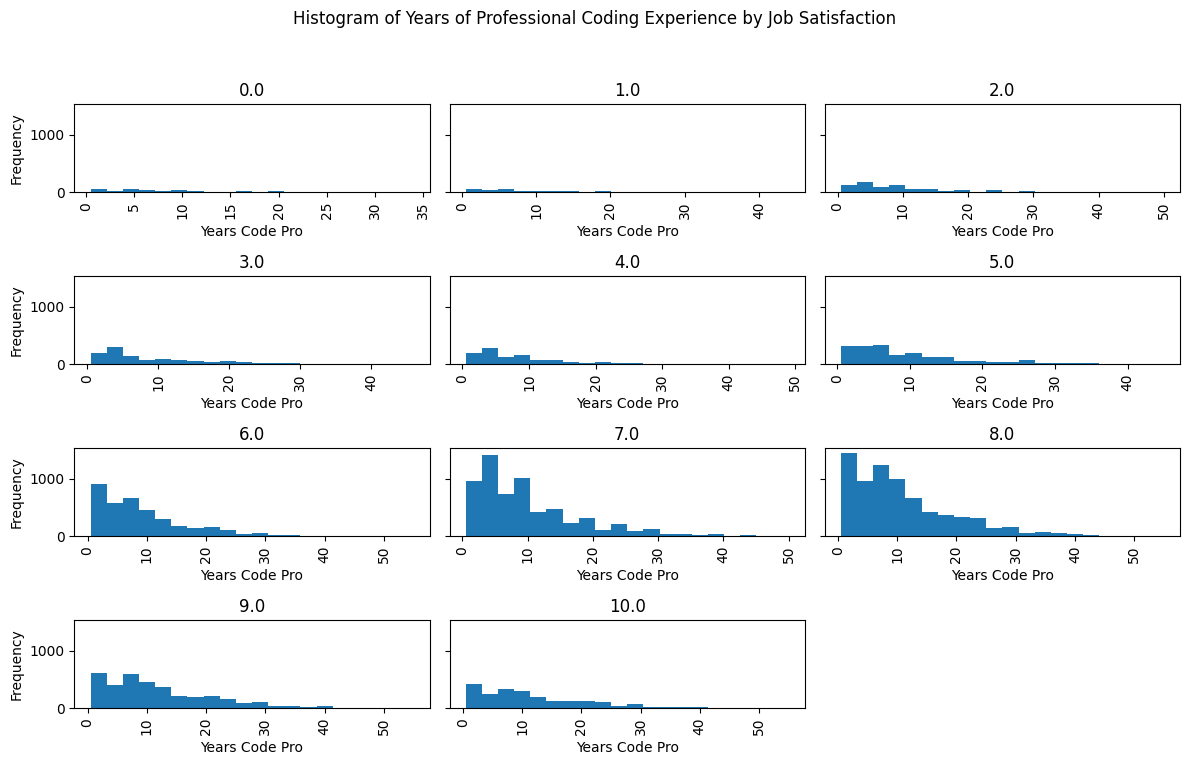

In [87]:
#plot the grouped histograms
ax = df_cleaned.hist(column='YearsCodePro_numeric', by='JobSat', figsize=(12, 8), bins=20, sharey=True)

# Customize the plots (optional)
plt.suptitle('Histogram of Years of Professional Coding Experience by Job Satisfaction')

# Iterate over axes to set labels and titles if needed
for axis in ax.flatten():
    axis.set_xlabel('Years Code Pro')
    axis.set_ylabel('Frequency')
    axis.set_title(axis.get_title()) # Keep the auto-generated title (JobSat category)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
